In [1]:
# 1. Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC


In [2]:
# 2. Load the handwritten digits dataset
digits = datasets.load_digits()



In [3]:
# Display shape
print("Image data shape:", digits.images.shape)
print("Label shape:", digits.target.shape)


Image data shape: (1797, 8, 8)
Label shape: (1797,)


In [4]:
# Convert images (8x8) → flatten into 64 features
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

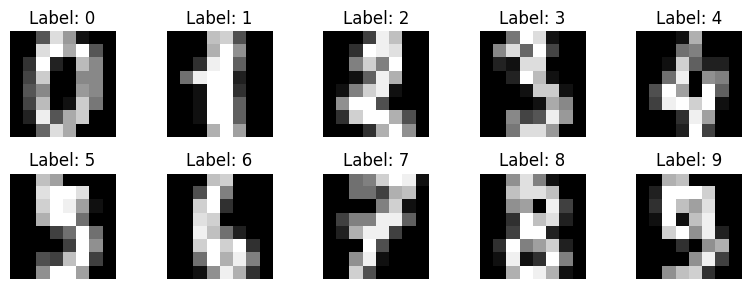

In [5]:
# Optional: Visualize first few images
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
# 3. Separate input features and targets
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (1797, 64)
Target vector shape: (1797,)


In [7]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1347, 64)
Testing set: (450, 64)


In [8]:
# 5. Build and train SVM model with GridSearchCV for best parameters

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.001, 0.0001],
    'kernel': ['rbf']
}

svm = SVC()

grid = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters found: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


Accuracy: 0.9888888888888889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        45
           5       1.00      0.98      0.99        46
           6       1.00      0.98      0.99        45
           7       0.98      1.00      0.99        45
           8       0.98      0.95      0.96        43
           9       0.98      0.98      0.98        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



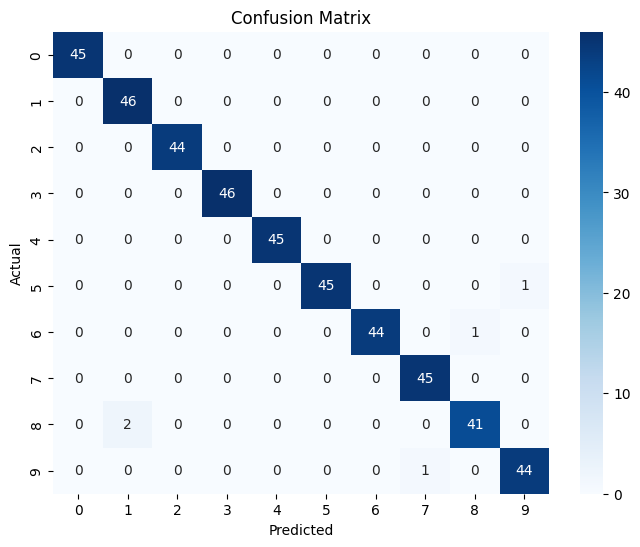

In [9]:
# 6. Model evaluation
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


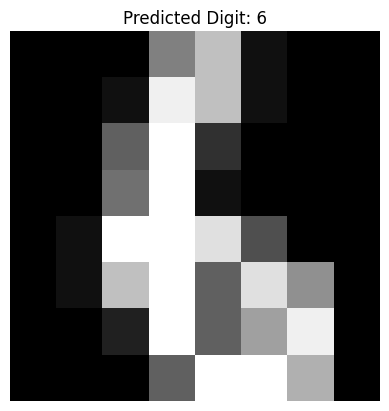

In [13]:
# 7. Prediction on a single image
index = 5
sample_image = X_test[index].reshape(1, -1)
predicted_digit = best_model.predict(sample_image)

plt.imshow(X_test[index].reshape(8,8), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis('off')
plt.show()

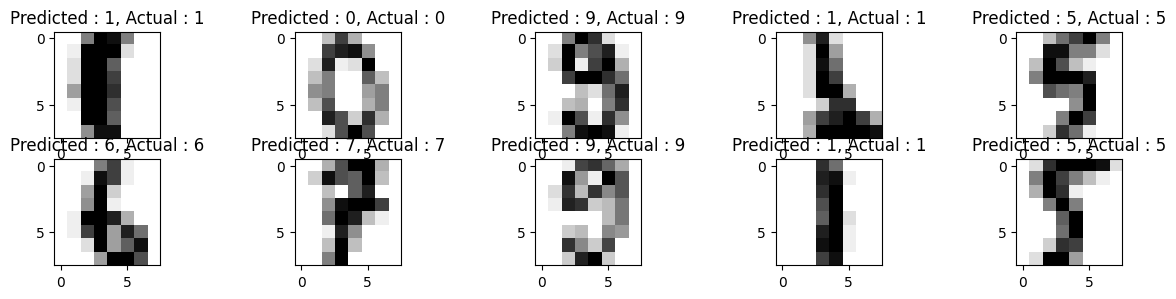

In [12]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predicted : {y_pred[i]}, Actual : {y_test[i]}")
    plt.axis('on')

Accuracy: 0.9777777777777777


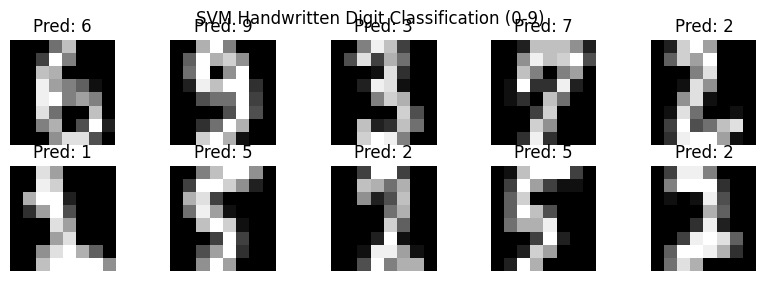

In [1]:
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Split data into features and labels
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create SVM model
model = SVC(kernel='linear')

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ---- Data Visualization ----
# Display first 10 test images with their predicted labels
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.suptitle("SVM Handwritten Digit Classification (0-9)")
plt.show()